In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import learning_curve

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\hh\Desktop\Semester 10\Machine Learning\Assignments\house_prices_data_training_data.csv')

Text(0.5, 0, 'scoring grades assigned to houses')

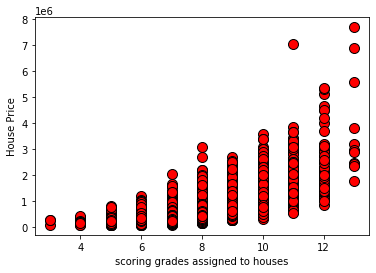

In [3]:
x_, y_ = data['grade'], data['price']
plt.plot(x_, y_, 'ro', ms=10, mec='k')
plt.ylabel('House Price')
plt.xlabel('scoring grades assigned to houses')

In [4]:
#Splitting data into 3 sets of training, cross-validation, and testing with ratios 6:2:2 respectively

train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

In [5]:
#calculates and returns the mean and standard-deviation for a given dataset

def getMeanStd(X):
    mean = X.mean()
    std = X.std()
    return mean, std

In [6]:
#normalizes a dataframe by centering the data at the mean

def normalize(X):

    X_norm = X
    mean, std = getMeanStd(X)
    X_norm = (X_norm - mean) / std
    
    return X_norm

In [7]:
#outputs the values of each feature as: x1 + x2^2 + x3^3, where x's represent features (cols in df)
#as a result, it returns a dataframe with each feature of the given df is raised to the power of its column-position in the dataframe

def retExpoFunc(X):
    
    s = X.shape[1]
    
    for i in range(1, s):
        X.iloc[:, i] = X.iloc[:, i].pow(i+1)
    return X

In [8]:
#this function uses the above-defined helper functions to perform the following:
# 1) uses the exponent function to raise each feature with its corresponding power
# 2) normalizes the given dataframe
# 3) converts the pandas df into a numpy array
# 4) concatenates a column of ones at the beginning of the features (X) such that it is a dummy variable for theta0

def NormArray(X):
    
    m = X.shape[0]
    
    Xn = retExpoFunc(X)
    Xn = normalize(Xn)
    Xn = Xn.to_numpy()
    Xn = np.concatenate([np.ones((m,1), dtype = float), Xn], axis =1)
    
    return Xn

In [9]:
#compute cost for linear regression with multiple variables.

def computeCostMulti(X, y, theta):
    
    m = y.shape[0] 
    
    J = 0
    
    Hyp = np.dot(X, theta)
    
    
    J = (1/(2 * m)) * np.sum(np.square(Hyp - y))
    
    return J

In [10]:
#Performs gradient descent to learn theta.
#Updates theta by taking num_iters gradient steps with learning rate alpha.

def gradientDescentMulti(X, y, theta, alpha, num_iters):

    m = y.shape[0] 
    theta = theta.copy()

    J_history = []
    
    for i in range(num_iters):

        Hyp = np.dot(X, theta)
        
        theta = theta - ((alpha/m)*(np.dot(X.T, Hyp-y)))

        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

In [11]:
#plots the cost function over a specified number of iterations.
#learning is achieved in each iteration as the error is decreasing.

def plotCost(X, y):
    alpha = 0.01
    num_iters = 400
    
    num_features = X.shape[1]

    theta = np.zeros((num_features, 1))
    theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

    plt.plot(np.arange(len(J_history)), J_history, lw=2)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    print('theta computed from gradient descent: \n {:s}'.format(str(theta)))
    print()
    return theta

In [12]:
#this section declares variables in corrspondance to each order of features used
#this model will use 5 features, thus, upto x^5
#each selected feature has been accounted for its range of values, as such, 
#features with high values have been places at the beginning to minimize the range of resulting 
#values when applying the exponent function
#ex., sqft_living measures are in the range of thousands,
#while bedrooms are in the range of single digits. thus, bedrooms, have
#been placed at the end to minimize the variance when raising the values of bedrooms to ^5

#this section further instantiates dataframes for each variable as train, validation, and test

X_train1 = train[['sqft_living']].copy()
X_train2 = train[['sqft_living' , 'grade']].copy()
X_train3 = train[['sqft_living' , 'grade', 'bathrooms']].copy()
X_train4 = train[['sqft_living' , 'grade', 'bathrooms', 'condition']].copy()
X_train5 = train[['sqft_living' , 'grade', 'bathrooms', 'condition', 'bedrooms']].copy()

X_cv1 = validate[['sqft_living']].copy()
X_cv2 = validate[['sqft_living' , 'grade']].copy()
X_cv3 = validate[['sqft_living' , 'grade', 'bathrooms']].copy()
X_cv4 = validate[['sqft_living' , 'grade', 'bathrooms', 'condition']].copy()
X_cv5 = validate[['sqft_living' , 'grade', 'bathrooms', 'condition', 'bedrooms']].copy()

X_test1 = test[['sqft_living']].copy()
X_test2 = test[['sqft_living' , 'grade']].copy()
X_test3 = test[['sqft_living' , 'grade', 'bathrooms']].copy()
X_test4 = test[['sqft_living' , 'grade', 'bathrooms', 'condition']].copy()
X_test5 = test[['sqft_living' , 'grade', 'bathrooms', 'condition', 'bedrooms']].copy()

y_train = train[['price']].copy()
y_cv = validate[['price']].copy()
y_test = test[['price']].copy()


In [13]:
#this section normalizes all variable created in the previous section and returns their correspnding numpy arrays

X_train1N = NormArray(X_train1)
X_train2N = NormArray(X_train2)
X_train3N = NormArray(X_train3)
X_train4N = NormArray(X_train4)
X_train5N = NormArray(X_train5)

X_cv1N = NormArray(X_cv1)
X_cv2N = NormArray(X_cv2)
X_cv3N = NormArray(X_cv3)
X_cv4N = NormArray(X_cv4)
X_cv5N = NormArray(X_cv5)

X_test1N = NormArray(X_test1)
X_test2N = NormArray(X_test2)
X_test3N = NormArray(X_test3)
X_test4N = NormArray(X_test4)
X_test5N = NormArray(X_test5)

y_trainN = NormArray(y_train)
y_cvN = NormArray(y_cv)
y_testN = NormArray(y_test)

theta computed from gradient descent: 
 [[ 9.82049447e-01 -5.56877753e-17]
 [ 2.01003930e-17  6.83252260e-01]]

theta computed from gradient descent: 
 [[ 9.82049447e-01 -3.26814128e-17]
 [ 2.76890589e-17  4.00410849e-01]
 [-2.54812582e-17  3.80331806e-01]]

theta computed from gradient descent: 
 [[ 9.82049447e-01 -2.80731494e-17]
 [ 3.01094664e-17  3.32234814e-01]
 [-2.55487002e-17  3.59824140e-01]
 [-1.04501708e-17  1.18132585e-01]]

theta computed from gradient descent: 
 [[ 9.82049447e-01 -2.76290190e-17]
 [ 3.08463937e-17  3.26306569e-01]
 [-2.55473637e-17  3.75680176e-01]
 [-1.02320638e-17  1.22340957e-01]
 [-1.98645902e-17  1.25166656e-01]]

theta computed from gradient descent: 
 [[ 9.82049447e-01 -2.79135914e-17]
 [ 3.08796007e-17  3.26310925e-01]
 [-2.54663510e-17  3.75682473e-01]
 [-1.02225026e-17  1.22338484e-01]
 [-1.96933121e-17  1.25074493e-01]
 [ 5.33206994e-19  3.47528022e-03]]



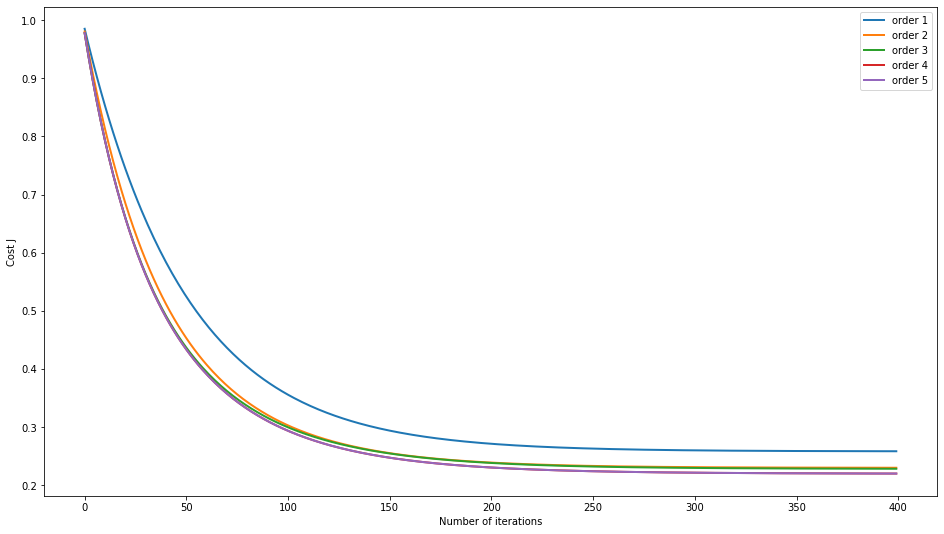

In [14]:
#plotting the cost for each training model starting by the one of the first order (order d = 1)
#printing the calculated theta values of theta after iterations and saving them for later use when testing

plt.figure(figsize=(16,9))

theta1 = plotCost(X_train1N, y_trainN)

theta2 = plotCost(X_train2N, y_trainN)

theta3 = plotCost(X_train3N, y_trainN)

theta4 = plotCost(X_train4N, y_trainN)

theta5 = plotCost(X_train5N, y_trainN)

plt.legend(["order 1", "order 2", "order 3", "order 4", "order 5"], loc="best")

In [15]:
#using the cross-validation set to test for the errors to then choose
#the function order that produces the least error/cost so that we can use it to further test it using the test set

J_cv1 = computeCostMulti(X_cv1N,y_cvN, theta1)
J_cv1

0.258627684730279

In [16]:
J_cv2 = computeCostMulti(X_cv2N,y_cvN, theta2)
J_cv2

0.2324944678428876

In [17]:
J_cv3 = computeCostMulti(X_cv3N,y_cvN, theta3)
J_cv3

0.2307529150882975

In [18]:
J_cv4 = computeCostMulti(X_cv4N,y_cvN, theta4)
J_cv4

0.2214400785423533

In [19]:
J_cv5 = computeCostMulti(X_cv5N,y_cvN, theta5)
J_cv5

0.22155415249438581

In [20]:
#it seems that by running the model several times using different train, test, validate sets,
#using degree 4 yields the least error result
#testing the model using the 4th order

J_test4 = computeCostMulti(X_test4N, y_testN, theta4)
J_test4

0.20054529694653972

In [21]:
#compute regularized cost for linear regression with multiple variables.

def RegCostMulti(X, y, theta, lambda_):
    
    m = y.size
    grad = np.zeros(theta.shape[1])
    
    h = X.dot(theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y)) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    
    grad = (1 / m) * np.dot(X.T, h-y)
    grad[1:] = grad[1:] + (lambda_ / m) * theta[1:]
    #print('theta computed from gradient descent: {:s}'.format(str(theta)))

    return J, 

In [22]:
#Performs gradient descent to learn theta.
#Updates theta by taking num_iters gradient steps with learning rate alpha.
#accounts for the regularization term lambda when iterating over theta

def ReggradientDescentMulti(X, y, theta, alpha, num_iters, lambda_):

    m = y.shape[0] 
    theta = theta.copy()

    J_history = []
    
    for i in range(num_iters):

        Hyp = np.dot(X, theta)
        
        theta = theta - ((alpha/m)*(np.dot(X.T, Hyp-y)) + lambda_*theta)

        J_history.append(RegCostMulti(X, y, theta, lambda_))
    
    return theta, J_history

In [23]:
#plots the regularized cost function over a specified number of iterations.
#learning is achieved in each iteration as the error is decreasing.

def plotRegCost(X, y, lambda_):
    alpha = 0.01
    num_iters = 200
    
    num_features = X.shape[1]

    theta = np.zeros((num_features, 1))
    
    theta, J_history = ReggradientDescentMulti(X, y, theta, alpha, num_iters, lambda_)

    plt.plot(np.arange(len(J_history)), J_history, lw=2)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    print('theta computed from gradient descent: \n {:s}'.format(str(theta)))
    print()
    return theta

theta computed from gradient descent: 
 [[ 4.91206027e-01 -1.24005389e-17]
 [ 2.59806590e-17  3.41737628e-01]]

theta computed from gradient descent: 
 [[ 4.91206027e-01 -1.11527797e-17]
 [ 2.59823954e-17  2.51633465e-01]
 [ 8.43434839e-19  2.45927034e-01]]

theta computed from gradient descent: 
 [[ 4.91206027e-01 -1.12404698e-17]
 [ 2.53273398e-17  2.15841256e-01]
 [ 2.80182683e-18  2.22633671e-01]
 [ 1.60634822e-18  1.32130894e-01]]

theta computed from gradient descent: 
 [[ 4.91206027e-01 -9.54696088e-18]
 [ 2.52720765e-17  2.15847686e-01]
 [ 1.63761654e-18  2.25384940e-01]
 [ 1.41995095e-18  1.33200716e-01]
 [-1.22868343e-17  5.05188181e-02]]

theta computed from gradient descent: 
 [[ 4.91206027e-01 -1.05475867e-17]
 [ 2.52726108e-17  2.15849082e-01]
 [ 1.64634448e-18  2.25387264e-01]
 [ 1.42386892e-18  1.33201172e-01]
 [-1.22833455e-17  5.04915954e-02]
 [ 1.56949824e-19  2.17950706e-03]]



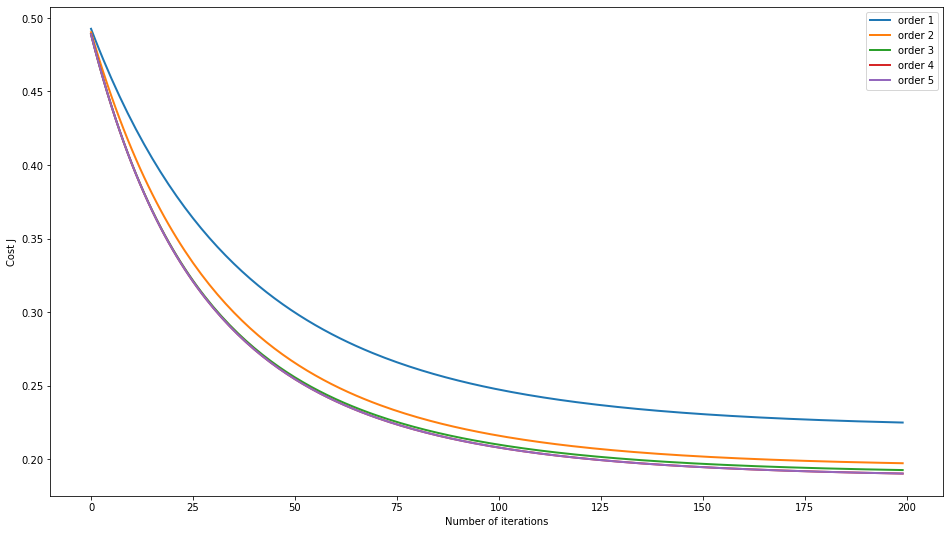

In [24]:
#plotting the regularized cost for each training model starting by the one of the first order (order d = 1)
#printing the calculated theta values of theta after iterations and saving them for later use when testing
plt.figure(figsize=(16,9))
thetaR1 = plotRegCost(X_train1N, y_trainN,0.01)

thetaR2 = plotRegCost(X_train2N, y_trainN,0.01)

thetaR3 = plotRegCost(X_train3N, y_trainN,0.01)

thetaR4 = plotRegCost(X_train4N, y_trainN,0.01)

thetaR5 = plotRegCost(X_train5N, y_trainN,0.01)

plt.legend(["order 1", "order 2", "order 3", "order 4", "order 5"], loc="best")

In [25]:
#using the cross-validation set to test for the errors to then choose
#the function order that produces the least error/cost so that we can use it to further test it using the test set
#as can be seen from the result, changing the lambda values do not affect for a big change
#as the calculated theta values are small, in this case, we want an alpha 


lambdas = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

for i in range(len(lambdas)):
    J_cv1R = RegCostMulti(X_cv1N, y_cvN, thetaR1, lambdas[i])
    print(J_cv1R)
    print(thetaR1)

(0.22511113759591442,)
[[ 4.91206027e-01 -1.24005389e-17]
 [ 2.59806590e-17  3.41737628e-01]]
(0.22511186749970258,)
[[ 4.91206027e-01 -1.24005389e-17]
 [ 2.59806590e-17  3.41737628e-01]]
(0.22511916653758413,)
[[ 4.91206027e-01 -1.24005389e-17]
 [ 2.59806590e-17  3.41737628e-01]]
(0.2251921569163998,)
[[ 4.91206027e-01 -1.24005389e-17]
 [ 2.59806590e-17  3.41737628e-01]]
(0.22592206070455623,)
[[ 4.91206027e-01 -1.24005389e-17]
 [ 2.59806590e-17  3.41737628e-01]]
(0.23322109858612064,)
[[ 4.91206027e-01 -1.24005389e-17]
 [ 2.59806590e-17  3.41737628e-01]]
(0.30621147740176474,)
[[ 4.91206027e-01 -1.24005389e-17]
 [ 2.59806590e-17  3.41737628e-01]]
(1.0361152655582058,)
[[ 4.91206027e-01 -1.24005389e-17]
 [ 2.59806590e-17  3.41737628e-01]]


In [26]:
J_cv2R = RegCostMulti(X_cv2N, y_cvN, thetaR2, 0.1)
J_cv2R

(0.19805023609549266,)

In [27]:
J_cv3R = RegCostMulti(X_cv3N, y_cvN, thetaR3, 0.1)
J_cv3R

(0.19304184693740054,)

In [28]:
J_cv4R = RegCostMulti(X_cv4N, y_cvN, thetaR4, 0.1)
J_cv4R

(0.19032005291361614,)

In [29]:
J_cv5R = RegCostMulti(X_cv5N, y_cvN, thetaR5, 0.1)
J_cv5R

(0.19030260182414507,)

In [30]:
#it seems that by running the model several times using different train, test, validate sets,
#using degree 4 yields the least error result
#testing the model using the 4th order
#it is also visible from the observations that using the regularized model
#yields less error (cost function output) than in the normal model selection scheme

J_test4R = RegCostMulti(X_test4N, y_testN, thetaR4, 0.1)
J_test4R

(0.17936227029790006,)

In [31]:
#This method describes thea implementation on the learning curves.
#the training  and CV sets' errors' are plotted for different number of features for the dataset
#the resulting curve would indicate whether this model has high variance / bias

def learning_curves(X_train, y_train, X_val, y_val):
   
    theta = np.zeros((X_train.shape[1], 1))
    itera = 100
    alpha = 0.01
    thetaTR = theta.copy()
    
    train_err = np.zeros(1000)
    val_err = np.zeros(1000)
    
    for i in range(1, 1000):
        
        thetaTR = gradDescLearning(X_train[0:i + 1, :], y_train[0:i + 1], theta, alpha, itera)
        
        train_err[i] = computeCostMulti(X_train[0:i + 1, :], y_train[0:i + 1], thetaTR[0])
        
        val_err[i] = computeCostMulti(X_val[0:i + 1, :], y_val[0:i + 1], thetaTR[0])
    plt.figure(figsize=(16,9))
    plt.plot(range(2, 1000 + 1), train_err[1:], c="r", linewidth=2)
    plt.plot(range(2, 1000 + 1), val_err[1:], c="b", linewidth=2)
    plt.xlabel("number of training examples", fontsize=14)
    plt.ylabel("error", fontsize=14)
    plt.legend(["training", "validation"], loc="best")
    plt.axis([2, 1000, 0, 1])
    plt.grid()

In [32]:

def gradDescLearning(X, y, theta, alpha, num_iters):


    m = y.shape[0] 

    #theta = np.expand_dims(theta, axis=-1)

    J_history = []
    
    for i in range(num_iters):

        Hyp = np.dot(X, theta)
        
        theta = theta - ((alpha/m)*(np.dot(X.T, Hyp-y)))

        #J_history.append(computeCostMulti(X, y, theta))
    
    return theta,

In [33]:
#we can conclude from the resulting learning curve that the model has high variance
#this is due to the high order polynomial hypothesis function used to train the model (X_train order 4)
#however, we can see that as we increase the number of training examples (data rows),
#both the training and and validation error seem to be approaching to a convergence point (0.26-0.33)
#we can then conclude that taking more data samples would allow this model to
#increase its performance

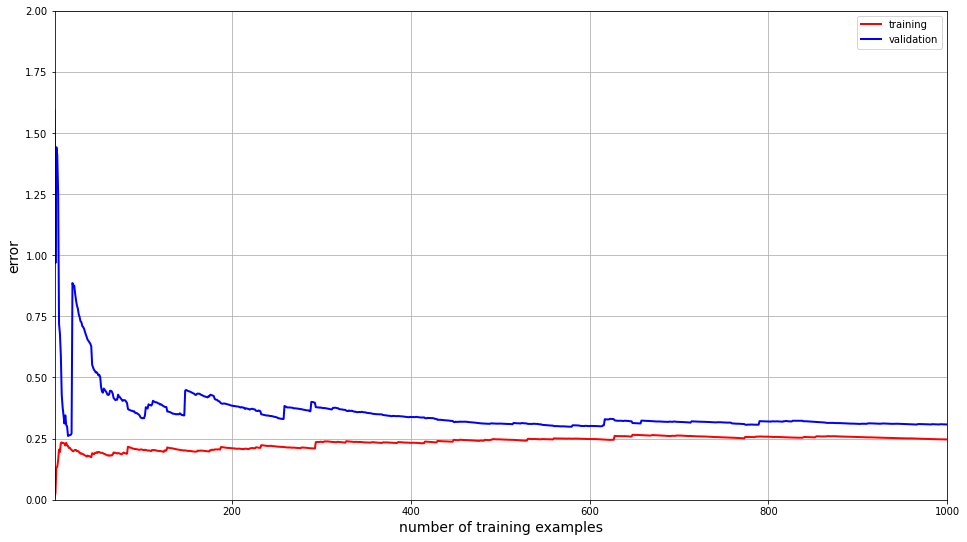

In [34]:
learning_curves(X_train4N, y_trainN, X_cv4N, y_cvN)